In [1]:
import warnings

import keras.layers

warnings.filterwarnings('ignore')
# import cv2
from keras.models import load_model
import tensorflow as tf
from keras import optimizers
import segmentation_models as sm
from commons import *

import metric
from architecture import create_model, create_callbacks


BACKUP_MODEL_PATH = "./../Models/backup.h5"
BACKUP_HISTORY_PATH = "./../Models/backup.csv"
seed = 56

IMAGE_HEIGHT = IMAGE_WIDTH = 256 * 2 # * 2

EPOCHS = 100
LEARNING_RATE = 0.0001
BATCH_SIZE = 4

ROOT = "./../Data/all-cities/"
TRAIN_DIR = "_Train512/"
USE_AUGMENTATION = True

Segmentation Models: using `keras` framework.


In [3]:
opt = keras.optimizers.Adam(LEARNING_RATE)
callbacks = create_callbacks(BACKUP_MODEL_PATH, BACKUP_HISTORY_PATH)

train_gen, val_gen = train_val_generator(IMAGE_WIDTH, IMAGE_HEIGHT, ROOT, TRAIN_DIR, BATCH_SIZE, seed,
                                         use_aug=USE_AUGMENTATION)

In [5]:
# """Load Model backup to resume training after crash or break or for pretraining"""
# model = load_model(BACKUP_MODEL_PATH, custom_objects={"dice_loss" : sm.losses.DiceLoss(), "iou_score": sm.metrics.IOUScore(threshold=0.5), "f1-score":sm.metrics.FScore()})

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=5e-06>


In [4]:
PRETRAINED_MODEL_PATH = "./../Models/Roads/road_mapper_scratch_x512_Combined_Train18598_Val1617_Test5079_No-Aug_IoU6065_f7516.h5"

model = load_model(PRETRAINED_MODEL_PATH, custom_objects={"dice_loss" : sm.losses.DiceLoss(), "iou_score": sm.metrics.IOUScore(threshold=0.1), "f1-score":sm.metrics.FScore(), "quality":metric.quality()})

first_half = ["conv2d_01","conv2d_02","conv2d_03","conv2d_04","conv2d_05","conv2d_06","conv2d_07","conv2d_08", "conv2d_09"]
second_half = ["conv2d_010","conv2d_011","conv2d_012","conv2d_013","conv2d_014","conv2d_015","conv2d_016","conv2d_017", "conv2d_018"]

for layer in model.layers:
      if layer.name in second_half:
            layer.trainable = False
      if layer.name in ["dropout", "dropout_1", "dropout_2", "dropout_3", "dropout_4", "dropout_5", "dropout_6", "dropout_7", "dropout_8"]:
            layer.rate = 2*layer.rate

#print(model.layers)
met = model.metrics[1:] #+ [metric.quality()] # [1:] to not include loss

model.compile(optimizer=opt, loss=model.loss, metrics= met, run_eagerly=True)

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 512, 512, 16  64         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [5]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

history = model.fit(train_gen.data,  validation_data=val_gen.data, steps_per_epoch=train_gen.samplesPerBatch, validation_steps=val_gen.samplesPerBatch, callbacks=list(callbacks), epochs=EPOCHS, verbose=1) #,

Num GPUs Available:  1
Epoch 1/100
 42/901 [>.............................] - ETA: 3:22 - loss: 0.8345 - iou_score: 0.0918 - f1-score: 0.1655

KeyboardInterrupt: 

In [7]:
model_path = "./../Models/Binary/512/bike_mapper_pre-train-freeze-right-lr1e-4_double-dropout_Train3607_Val313_Test980_No-Aug.h5"
save_model(model, model_path=model_path, csv_history_path_to_delete=BACKUP_HISTORY_PATH)
plot_history(history, model_path)

Time of saving model: 2022-10-26 10:53:53.951043


Found 7738 images belonging to 1 classes.
Found 672 images belonging to 1 classes.
Found 7738 images belonging to 1 classes.
Found 672 images belonging to 1 classes.
Num GPUs Available:  1
Epoch 1/6
1935/1934 [==============================] - ETA: 0s - loss: 0.6525 - iou_score: 0.2168 - f1-score: 0.3475 - quality: 0.4808
Epoch 1: val_loss improved from inf to 0.60515, saving model to ./../Models\backup.h5
1934/1934 [==============================] - 1357s 699ms/step - loss: 0.6525 - iou_score: 0.2168 - f1-score: 0.3475 - quality: 0.4808 - val_loss: 0.6051 - val_iou_score: 0.2525 - val_f1-score: 0.3949 - val_quality: 0.5614 - lr: 1.0000e-04
Epoch 2/6
1935/1934 [==============================] - ETA: 0s - loss: 0.6005 - iou_score: 0.2568 - f1-score: 0.3995 - quality: 0.5537
Epoch 2: val_loss improved from 0.60515 to 0.57826, saving model to ./../Models\backup.h5
1934/1934 [==============================] - 1339s 692ms/step - loss: 0.6005 - iou_score: 0.2568 - f1-score: 0.3995 - quality:

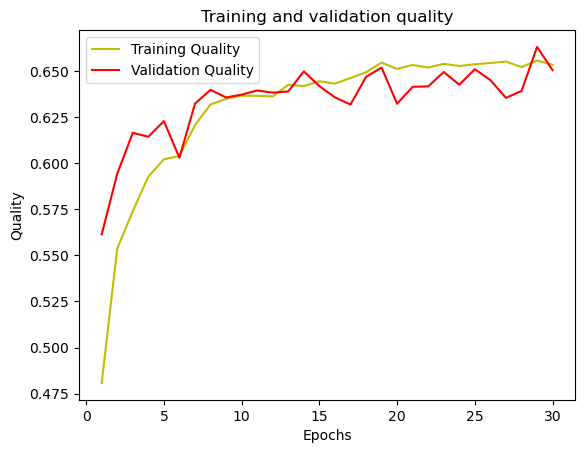

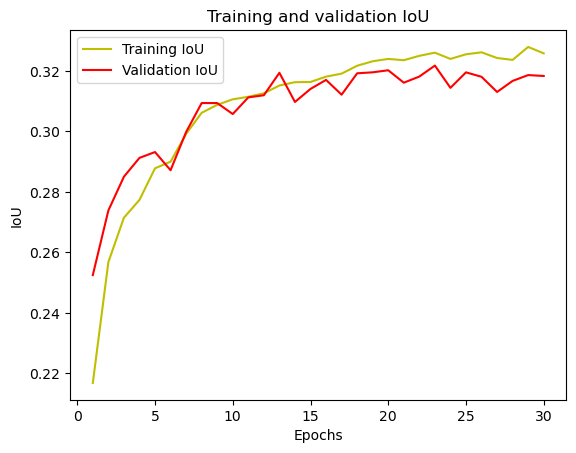

Found 7738 images belonging to 1 classes.
Found 672 images belonging to 1 classes.
Found 7738 images belonging to 1 classes.
Found 672 images belonging to 1 classes.
Num GPUs Available:  1
Epoch 1/6
1935/1934 [==============================] - ETA: 0s - loss: 0.6497 - iou_score: 0.2188 - f1-score: 0.3502 - quality: 0.4633
Epoch 1: val_loss improved from inf to 0.62698, saving model to ./../Models\backup.h5
1934/1934 [==============================] - 1225s 632ms/step - loss: 0.6497 - iou_score: 0.2188 - f1-score: 0.3502 - quality: 0.4633 - val_loss: 0.6270 - val_iou_score: 0.2362 - val_f1-score: 0.3730 - val_quality: 0.5008 - lr: 1.0000e-04
Epoch 2/6
1935/1934 [==============================] - ETA: 0s - loss: 0.6099 - iou_score: 0.2497 - f1-score: 0.3902 - quality: 0.5219
Epoch 2: val_loss improved from 0.62698 to 0.59798, saving model to ./../Models\backup.h5
1934/1934 [==============================] - 1200s 619ms/step - loss: 0.6099 - iou_score: 0.2497 - f1-score: 0.3902 - quality:

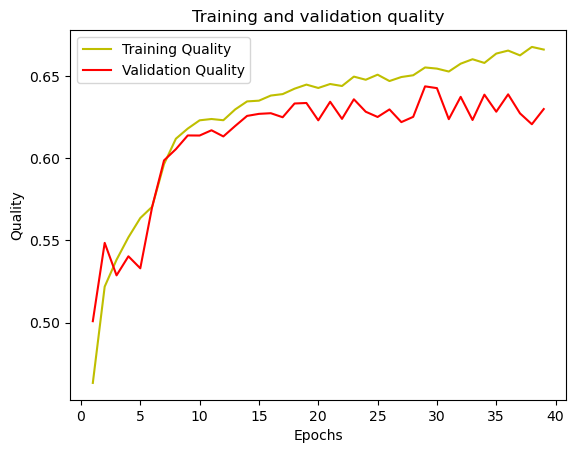

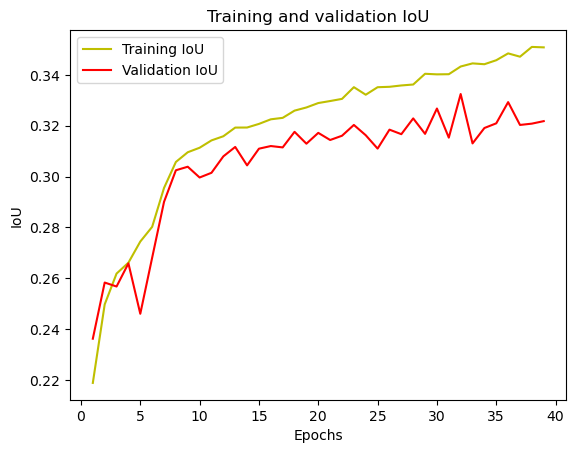

Found 7738 images belonging to 1 classes.
Found 672 images belonging to 1 classes.
Found 7738 images belonging to 1 classes.
Found 672 images belonging to 1 classes.
Num GPUs Available:  1
Epoch 1/6
1935/1934 [==============================] - ETA: 0s - loss: 0.6604 - iou_score: 0.2110 - f1-score: 0.3396 - quality: 0.4547
Epoch 1: val_loss improved from inf to 0.65550, saving model to ./../Models\backup.h5
1934/1934 [==============================] - 761s 393ms/step - loss: 0.6604 - iou_score: 0.2110 - f1-score: 0.3396 - quality: 0.4547 - val_loss: 0.6555 - val_iou_score: 0.2132 - val_f1-score: 0.3445 - val_quality: 0.4900 - lr: 1.0000e-04
Epoch 2/6
1935/1934 [==============================] - ETA: 0s - loss: 0.6208 - iou_score: 0.2410 - f1-score: 0.3792 - quality: 0.5074
Epoch 2: val_loss improved from 0.65550 to 0.63022, saving model to ./../Models\backup.h5
1934/1934 [==============================] - 757s 391ms/step - loss: 0.6208 - iou_score: 0.2410 - f1-score: 0.3792 - quality: 0

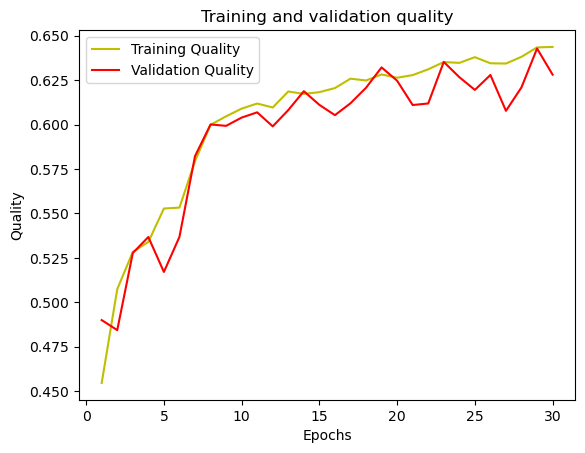

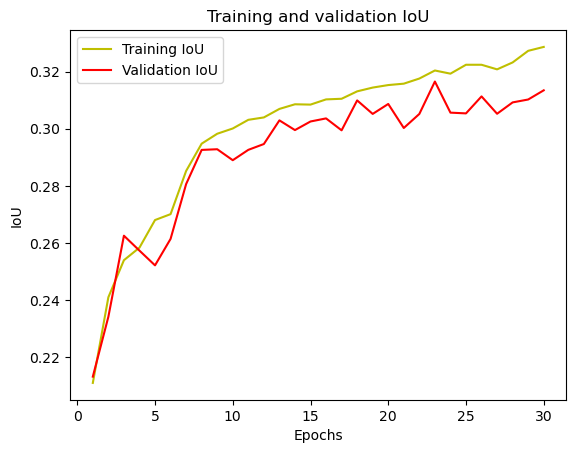

Found 7738 images belonging to 1 classes.
Found 672 images belonging to 1 classes.
Found 7738 images belonging to 1 classes.
Found 672 images belonging to 1 classes.
Num GPUs Available:  1
Epoch 1/6
1935/1934 [==============================] - ETA: 0s - loss: 0.6900 - iou_score: 0.1889 - f1-score: 0.3100 - quality: 0.4085
Epoch 1: val_loss improved from inf to 0.66336, saving model to ./../Models\backup.h5
1934/1934 [==============================] - 1154s 595ms/step - loss: 0.6900 - iou_score: 0.1889 - f1-score: 0.3100 - quality: 0.4085 - val_loss: 0.6634 - val_iou_score: 0.2089 - val_f1-score: 0.3366 - val_quality: 0.4425 - lr: 1.0000e-04
Epoch 2/6
1935/1934 [==============================] - ETA: 0s - loss: 0.6395 - iou_score: 0.2267 - f1-score: 0.3606 - quality: 0.4757
Epoch 2: val_loss improved from 0.66336 to 0.63380, saving model to ./../Models\backup.h5
1934/1934 [==============================] - 1142s 590ms/step - loss: 0.6395 - iou_score: 0.2267 - f1-score: 0.3606 - quality:

In [ ]:
#PRETRAINED_MODEL_PATH = "./../Models/Roads/triple-param/road_mapper_scratch_Combined_Aug_IoU6075_q8080.h5"
paths = [
    ("./../Models/Roads/backbones/" + "road_mapper_pre-train-scratch-efficientnetb2_Aug_IoU6255_q8678.h5", "efficientnetb2"),
    ("./../Models/Roads/backbones/" +"road_mapper_pre-train-scratch-densenet121_Aug_IoU6256_q8446.h5", "densenet121"),
    ("./../Models/Roads/backbones/" +"road_mapper_pre-train-scratch-resnet34_Aug_IoU6145_q8386.h5", "resnet34"),
    ("./../Models/Roads/backbones/" +"road_mapper_pre-train-scratch-vgg16_Aug_IoU6426_q8564.h5", "vgg16")
]

first_half = (["conv2d_01","conv2d_02","conv2d_03","conv2d_04","conv2d_05","conv2d_06","conv2d_07","conv2d_08", "conv2d_09"], "freeze-left")
second_half = (["conv2d_010","conv2d_011","conv2d_012","conv2d_013","conv2d_014","conv2d_015","conv2d_016","conv2d_017", "conv2d_018"], "freeze-right")

halves = [second_half]#, first_half]

for model in paths:
    PRETRAINED_MODEL_PATH = model[0]
    for half in halves:
          model_path = "./../Models/Double-Data/road-pre-trained-backbones/bike_mapper_pre-train-" + model[1] + half[1] + "_Aug.h5"


          train_gen, val_gen = train_val_generator(IMAGE_WIDTH, IMAGE_HEIGHT, ROOT, TRAIN_DIR, BATCH_SIZE, seed,
                                             use_aug=USE_AUGMENTATION)

          # define model
          model: keras.Model = load_model(PRETRAINED_MODEL_PATH, custom_objects={"dice_loss" : sm.losses.DiceLoss(), "iou_score": sm.metrics.IOUScore(threshold=0.1), "f1-score":sm.metrics.FScore(), "quality":metric.quality()})

          nb_train_false = 0
          nb_layers = len(model.layers)
          layers = model.layers if half[1] == "freeze-left" else model.layers[::-1]
          for i, layer in enumerate(layers):
              if "decoder_stage0" in layer.name and half[1] == "freeze-left":
                  break
              elif "decoder_stage0_upsampling" in layer.name and half[1] == "freeze-right":
                  break

              if isinstance(layer, keras.layers.Conv2D) or isinstance(layer, keras.layers.DepthwiseConv2D):
                  layer.trainable = False
                  nb_train_false += 1

                # if layer.name in ["dropout", "dropout_1", "dropout_2", "dropout_3", "dropout_4", "dropout_5", "dropout_6", "dropout_7", "dropout_8"]:
                #       layer.rate = 2*layer.rate
          if nb_train_false < 5:
              print("could only freeze", nb_train_false, "layers")
              raise Exception

          # Open the file
          with open(model_path[:-3] + "__summary.txt",'w') as fh:
              # Pass the file handle in as a lambda function to make it callable
              model.summary(print_fn=lambda x: fh.write(x + '\n'))
              fh.write("number of frozen Conv2D and DepthwiseConv2D layers" + str(nb_train_false) + "\n")


          opt = keras.optimizers.Adam(LEARNING_RATE)
          callbacks = create_callbacks(BACKUP_MODEL_PATH, BACKUP_HISTORY_PATH)

          met = model.metrics[1:] #+ [metric.quality()] # [1:] to not include loss

          model.compile(optimizer=opt, loss=model.loss, metrics= met, run_eagerly=True)

          print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

          history1 = model.fit(train_gen.data,  validation_data=val_gen.data, steps_per_epoch=train_gen.samplesPerBatch, validation_steps=val_gen.samplesPerBatch, callbacks=list(callbacks), epochs=6, verbose=1)

          for layer in model.layers:
                layer.trainable = True


          opt = model.optimizer
          opt.lr = LEARNING_RATE / 10

          model.compile(
            optimizer=opt,
            loss=sm.losses.DiceLoss(),
            metrics=[sm.metrics.IOUScore(threshold=0.1), sm.metrics.FScore(), metric.quality()], run_eagerly=True
          )

          history = model.fit(train_gen.data,  validation_data=val_gen.data, steps_per_epoch=train_gen.samplesPerBatch, validation_steps=val_gen.samplesPerBatch, callbacks=list(callbacks), epochs=EPOCHS, verbose=1, initial_epoch=6) #,

          keys = ['quality', 'iou_score', 'val_iou_score', 'val_quality']
          for key in keys:
                history.history[key] = history1.history[key] + history.history[key]

          save_model(model, model_path=model_path, csv_history_path_to_delete=BACKUP_HISTORY_PATH)
          plot_history(history, model_path)


In [ ]:
import os
os.system("shutdown /s /t 5")